In [1]:
import glob
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.constants as const
from IPython.display import clear_output

# The Astrophysical Distance Ladder

## Step 1: Cepheus and the Seven Sisters

In [2]:
mMplds = 5 * np.log10(120) - 5
Psnor = 9.75
vsnor = 6.42
EBmVsnor = 0.18

With our given values for S Normae, we can calculate the visual extinction correction $A_V$ using

$$A_V=3.1\,E(B-V)$$

In [3]:
AVsnor = 3.1 * EBmVsnor
print(f'AVsnor = {AVsnor:.3f}')

AVsnor = 0.558


Applying this correction using

$$v_0=v-A_V$$

we get

In [4]:
v0 = vsnor - AVsnor
print(f'v0 = {v0}')

v0 = 5.862


 We now wish to find the extinction between the Pleiades and NGC 6087, and eventually the distance modulus between them. First, we read the data for each cluster and plot an HR diagram and Color-Color diagram.

In [5]:
fpath = 'HW8AuxFiles'
plds = pd.read_csv(fpath+'/cluple.dat', sep='\s+', header=2)
ngc = pd.read_csv(fpath+'/clu6087.dat', sep='\s+', header=2)

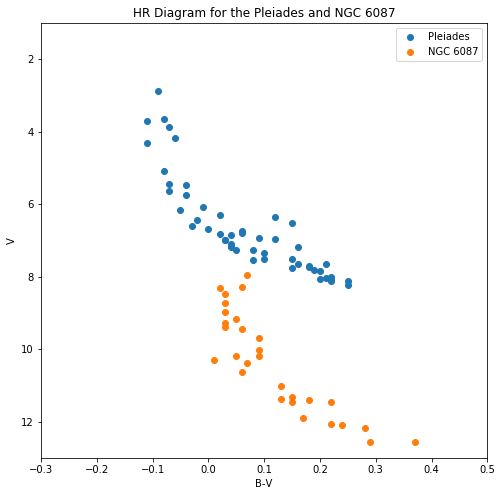

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(plds['B-V'], plds.V, label='Pleiades')
plt.scatter(ngc['B-V'], ngc.V, label='NGC 6087')

plt.title('HR Diagram for the Pleiades and NGC 6087')
plt.xlabel('B-V')
plt.ylabel('V')
plt.legend()
plt.xlim([-0.3, 0.5])
plt.ylim([13, 1])
plt.show()

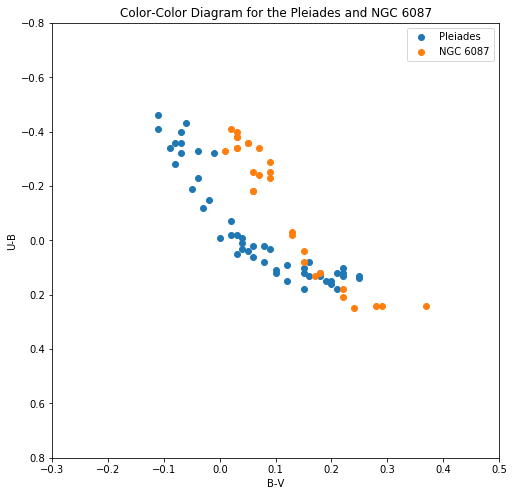

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(plds['B-V'], plds['U-B'], label='Pleiades')
plt.scatter(ngc['B-V'], ngc['U-B'], label='NGC 6087')

plt.title('Color-Color Diagram for the Pleiades and NGC 6087')
plt.xlabel('B-V')
plt.ylabel('U-B')
plt.legend()
plt.xlim([-0.3, 0.5])
plt.ylim([0.8, -0.8])
plt.show()

We can first try to find the extinction $\Delta E(B-V)$ between the clusters by aligning the main sequences in the Color-Color diagram.

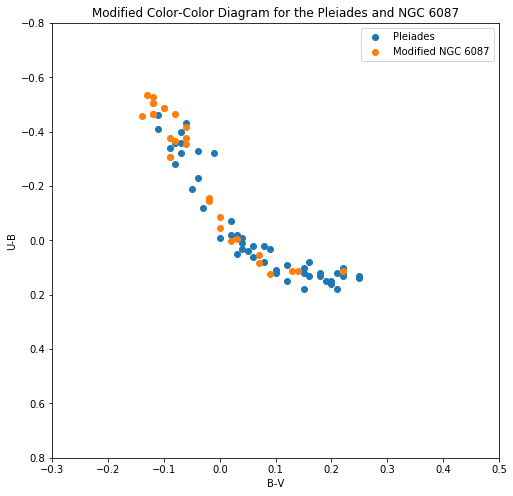

Enter ΔE(B-V), or type 'exit' to quit:
exit

ΔE(B-V) = 0.15


In [8]:
dEBmV = input('Enter first estimate of ΔE(B-V):\n')

while(dEBmV != 'exit' and dEBmV != 'quit'):
    try:
        dEBmV = float(dEBmV)
        dEUmB = 0.84 * dEBmV
        BmV2o = ngc['B-V'] - dEBmV
        UmB2o = ngc['U-B'] - dEUmB

        clear_output(wait=True)

        plt.figure(figsize=(8, 8))
        plt.scatter(plds['B-V'], plds['U-B'], label='Pleiades')
        plt.scatter(BmV2o, UmB2o, label='Modified NGC 6087')
        plt.title('Modified Color-Color Diagram'+
                  ' for the Pleiades and NGC 6087')
        plt.xlabel('B-V')
        plt.ylabel('U-B')
        plt.legend()
        plt.xlim([-0.3, 0.5])
        plt.ylim([0.8, -0.8])
        plt.show()

        dAv = 3.1*dEBmV
        dEBmV = input("Enter ΔE(B-V), or type 'exit' to quit:\n")

    except(ValueError):
        print("Please enter a number, or type 'exit' to quit")
        dEBmV = input('Enter ΔE(B-V):\n')

dEBmV = dAv / 3.1
print(f'\nΔE(B-V) = {dEBmV}')

Applying this correction to NGC 6087, we note how the HR diagrams of the clusters are now vertically aligned.

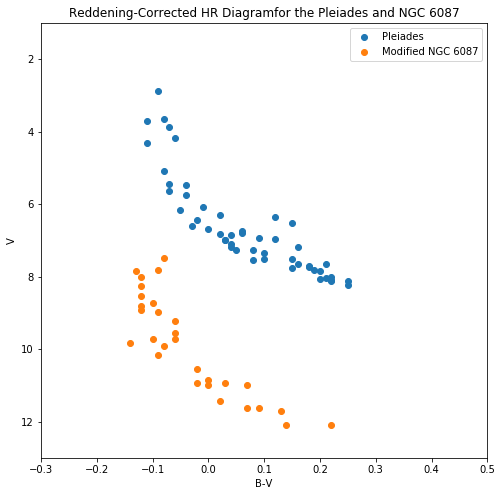

In [9]:
V2o = ngc.V - dAv

plt.figure(figsize=(8, 8))
plt.scatter(plds['B-V'], plds.V, label='Pleiades')
plt.scatter(BmV2o, V2o, label='Modified NGC 6087')
plt.title('Reddening-Corrected HR Diagram'+
          'for the Pleiades and NGC 6087')
plt.xlabel('B-V')
plt.ylabel('V')
plt.legend()
plt.xlim([-0.3, 0.5])
plt.ylim([13, 1])
plt.show()

Now we find the distance modulus $\Delta(m-M)$ between the clusters by using a similar method as before, only this time we align the reddening-corrected HR diagram:

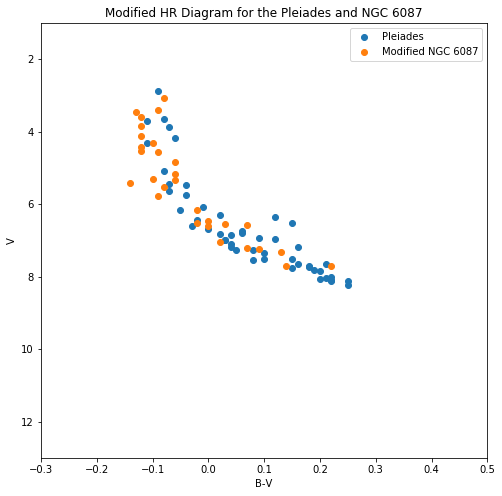

Enter Δ(m-M), or type 'exit' to quit:
exit

Δ(m-M) = 4.4


In [10]:
dmM = input('Enter first estimate of Δ(m-M):\n')

while(dmM != 'exit' and dmM != 'quit'):
    try:
        dmM = float(dmM)
        V2c = V2o - dmM

        clear_output(wait=True)

        plt.figure(figsize=(8, 8))
        plt.scatter(plds['B-V'], plds.V, label='Pleiades')
        plt.scatter(BmV2o, V2c, label='Modified NGC 6087')
        plt.title('Modified HR Diagram for the Pleiades and NGC 6087')
        plt.xlabel('B-V')
        plt.ylabel('V')
        plt.legend()
        plt.xlim([-0.3, 0.5])
        plt.ylim([13, 1])
        plt.show()

        dmM = input("Enter Δ(m-M), or type 'exit' to quit:\n")

    except(ValueError):
        print("Please enter a number, or type 'exit' to quit")
        dmM = input('Enter Δ(m-M):\n')

dmM = V2o[0]-V2c[0]
mMngc = mMplds + dmM
d = 10 ** (0.2 * mMngc + 1)
print(f'\nΔ(m-M) = {dmM}')

Now we have a distance modulus between the Pleiades and NGC 6087. Since the Pleiades has a distance modulus of

In [11]:
print(f'(m-M) Pleiades = {mMplds:.1f}')

(m-M) Pleiades = 5.4


this means NGC 6087 has a distance modulus of

In [12]:
print(f'(m-M) NGC 6087 = {mMngc:.1f}')

(m-M) NGC 6087 = 9.8


corresponding to a distance of

In [13]:
print(f'Distance to NGC 6087 = {d * u.pc:.1f}')

Distance to NGC 6087 = 910.3 pc


Now we calculate our average absolute visual magnitude of S Normae to be

In [14]:
Vsnor = v0 - mMngc
print(f'avV = {Vsnor:.2f}')

avV = -3.93


We can compare the fluxes of these stars by using

$$\frac{L_\text{S Nor}}{L_\text{Sun}}=10^{0.4(V_\text{Sun}-V_\text{S Nor})}$$

giving us

In [15]:
Lsnor = 10 ** (0.4 * (4.8 - Vsnor))
print(f'Lsnor = {Lsnor * u.L_sun:.0f}')

Lsnor = 3116 solLum


At a distance of 25 Mpc, we have

In [16]:
v25mpc = Vsnor + 5 * np.log10(25 * 10 ** 6) - 5
print(f'v25mpc = {v25mpc:.2f}')

v25mpc = 28.06


For the sun to have the same apparent magnitude, we have

In [17]:
dsun25mpc = 10 ** (0.2 * (v25mpc - 4.8) + 1)
print(f'dsun = {dsun25mpc / 1000* u.kpc:.2f}')

dsun = 447.88 kpc


## Step 2: A Really Long Meterstick

First, we load in the information for each group of Cepheids

In [18]:
galceph = pd.read_csv(fpath+'/cepgal.dat', sep='\s+', header=2,
                      names=['P', 'V'])
LMCceph = pd.read_csv(fpath+'/plr.dat', sep='\s\s+', header=2,
                      names=['logP', 'V', 'V-I'])
LMCcephSP = pd.read_csv(fpath+'/spc.dat', sep='\s\s+', header=2,
                        names=['logP', 'V'])

Similar to before, we now find an approximation for the distance modulus between the Milky Way cepheids and the LMC cepheids. This time, however, we align their period-luminosity curve, as opposed to the HR diagrams.

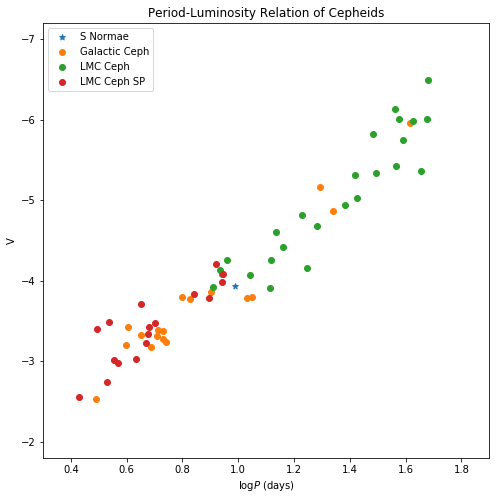

Enter dist mod of LMC, or type 'exit' to quit:
exit

mmM 	= 18.4
dLMC 	= 47.86 kpc


In [19]:
logPsnor = np.log10(Psnor)
EBmV = 0.12
AvLMC = 3.1 * EBmV
magvLMC = LMCceph.V - AvLMC
magvLM = LMCcephSP.V - AvLMC

mmM = input('Enter first estimate of dist mod of LMC:\n')

while(mmM != 'exit' and mmM != 'quit'):
    try:
        mmM = float(mmM)

        MvLMC = magvLMC - mmM
        MvLM = magvLM - mmM

        clear_output(wait=True)

        plt.figure(figsize=(8, 8))
        plt.scatter(logPsnor, Vsnor, marker='*',
                    label='S Normae', zorder=1)
        plt.scatter(np.log10(galceph.P), galceph.V,
                    label='Galactic Ceph')
        plt.scatter(LMCceph.logP, MvLMC, label='LMC Ceph')
        plt.scatter(LMCcephSP.logP, MvLM, label='LMC Ceph SP')
        plt.xlim([0.3, 1.9])
        plt.ylim([-1.8, -7.2])

        plt.title('Period-Luminosity Relation of Cepheids')
        plt.xlabel('$\log{P}$ (days)')
        plt.ylabel('V')
        plt.legend()
        plt.show()

        mmM = input("Enter dist mod of LMC, or type 'exit' to quit:\n")
    except(ValueError):
        print("Please enter a number, or type 'exit' to quit:\n")
        mmM = input('\nEnter dist mod of LMC: ')

mmM = magvLMC[0] - MvLMC[0]
dLMC = 10 ** (0.2 * mmM + 1)
print(f'\nmmM \t= {mmM}\ndLMC \t= {dLMC / 1000:.2f} kpc')

## Step 3: A Really Old Clock

We now use the Lafler Kinman method to determine the periods of several Cepheids.

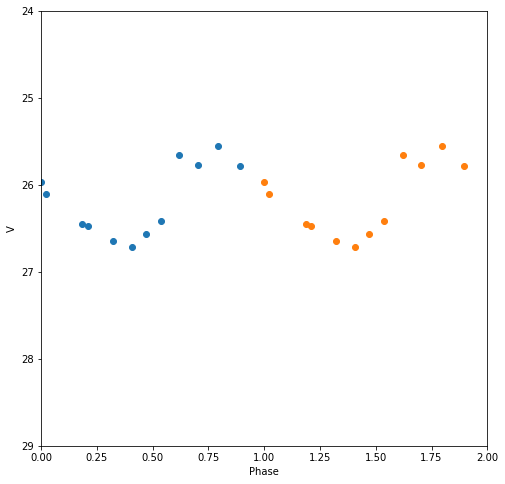

[36.34 36.36 36.38 36.4  36.42 36.44 36.46 36.48 36.5  36.52 36.54 36.56
 36.58 36.6  36.62 36.64 36.66 36.68 36.7  36.72 36.74 36.76 36.78 36.8
 36.82 36.84 36.86 36.88 36.9  36.92 36.94 36.96 36.98 37.   37.02 37.04
 37.06 37.08 37.1  37.12 37.14 37.16 37.18 37.2  37.22 37.24 37.26 37.28
 37.3  37.32 37.34 37.36 37.38 37.4  37.42 37.44 37.46 37.48 37.5  37.52
 37.54 37.56 37.58 37.6  37.62 37.64 37.66 37.68 37.7  37.72 37.74 37.76
 37.78 37.8  37.82 37.84 37.86 37.88 37.9  37.92 37.94 37.96 37.98 38.
 38.02 38.04 38.06]
are the best periods for cepv19.dat
Enter new period, 0 to finish0


In [20]:
cepvfiles = glob.glob(fpath+'/cepv*.dat')
IP = 3.5
FP = 57
DP = 0.02
ceps = pd.DataFrame(columns=['cep', 'P', 'avV']) 
for file in cepvfiles:
    t, v = np.genfromtxt(file, skip_header=3,
                         unpack=True)
    jj = np.size(v)
    NP = int((FP - IP) / DP)
    th = np.zeros(NP)
    P = []
    the = th
    avv = np.average(v)
    sqs=(v - avv) ** 2
    sig = np.sum(sqs)

    for k in range(0, NP):
        P = np.append(P, IP + k * DP)
        pinv = 1 / P[k]
        f = (t - t[0]) * pinv
        f = [i - int(i) for i in f]
        vv = v[np.argsort(f)]
        for i in range(0, jj-1):
            th[k] = th[k] + (vv[i] - vv[i+1]) ** 2
        th[k] = th[k] + (vv[0] - vv[jj - 1]) ** 2
    the = th / sig
    
    plt.figure(figsize=(8,8))
    plt.xlim([1, FP])
    plt.ylim([0, np.max(the)+0.5])
    plt.xlabel('Period')
    plt.ylabel('Function Theta')
    plt.plot(P, the)
    plt.show()
    indi = np.min(the)
    pp = P[the == indi]
    
    psel = pp[0]
    while psel != 0:
        fap = []
        pha = []
        piv = 1 / psel
        for kk in range(0, jj):
            fap = np.append(fap, (t[kk] - t[0]) * piv)
            pha = np.append(pha, fap[kk] - np.fix(fap[kk]))
        pha2=1+pha
        plt.figure(figsize=(8,8))
        plt.xlim([0, 2])
        plt.ylim([29, 24])
        plt.xlabel('Phase')
        plt.ylabel('V')
        plt.scatter(pha, v)
        plt.scatter(pha2, v)
        plt.show()
        print(f'{pp}\nare the best periods for {file[12:]}')
        psel = float(input('Enter new period, 0 to finish'))
        clear_output(wait=True)
    ceps = ceps.append({'cep':file[12:], 'P':1 / piv, 'avV':np.mean(v)},
                       ignore_index=True)

Now that we have a list of the periods, we find the difference in distance modulus between the LMC and NGC 1365 by eye, same as before.

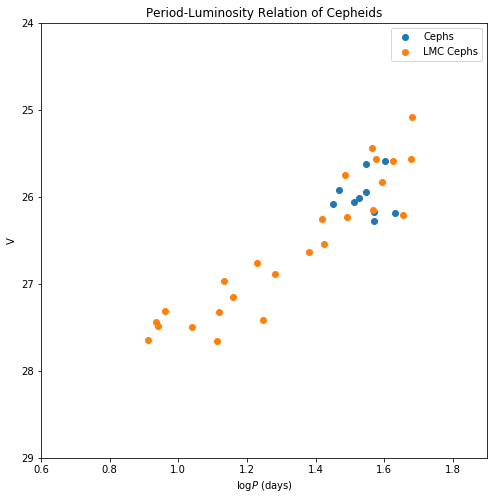

Enter delta(m-M), or type 'exit' to quit:
exit
delta(m-M) = 12.8
NGC 1365 = 17.378 Mpc


In [21]:
logP = np.log10(ceps.P.values)
magv = ceps.avV.values
logPLMC = LMCceph.logP
magvLMC = LMCceph.V
coviLMC = LMCceph['V-I']
magiLMC = magvLMC - coviLMC
dmagV = input('Enter first estimate of delta(m-M) in V:\n')

while(dmagV != 'exit' and dmagV != 'quit'):
    try:
        dmagV = float(dmagV)

        magvL = magvLMC + dmagV

        clear_output(wait=True)

        plt.figure(figsize=(8, 8))
        plt.scatter(logP, magv,
                    label='Cephs')
        plt.scatter(logPLMC, magvL,
                    label='LMC Cephs')
        plt.xlim([0.6,1.9])
        plt.ylim([29, 24])

        plt.title('Period-Luminosity Relation of Cepheids')
        plt.xlabel('$\log{P}$ (days)')
        plt.ylabel('V')
        plt.legend()
        plt.show()

        dmagV = input("Enter delta(m-M), or type 'exit' to quit:\n")
    except(ValueError):
        print("Please enter a number, or type 'exit' to quit:\n")
        dmagV = input('\nEnter delta(m-M): ')
dmagV = magvL[0] - magvLMC[0]
print(f'delta(m-M) = {dmagV:.1f}')
dm1365 = mmM + dmagV
d1365 = 10 ** (0.2 * dm1365 + 1)
print(f'NGC 1365 = {d1365 / 1000000:.3f} Mpc')

Since we know the Coma cluster is 5.7 times the distance to the Fornax Cluster, and has a redshift of 7185 km/s, we find Hubble's Constant using

$$H_0=\frac{v}{d}$$

In [22]:
H0 = (7185 * u.km / u.s / (d1365 * u.pc * 5.7)).to(u.km / u.s / u.Mpc)
print(f'H0 = {H0:.2f}')

H0 = 72.54 km / (Mpc s)


And finally

In [23]:
print(f'1/H0 = {(1/H0).to(u.Gyr):.2f}')

1/H0 = 13.48 Gyr
